## Content
1. Data extraction
2. Data Exploration Analysis & Data Cleaning
3. Data Pre Processing
    * Feature Engineering
    * Train Test Split
4. Data visualizations
5. Text Mining
    * World Cloud
    * K-Means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data

timesheets = pd.read_excel('/Users/Sayli/Documents/Masters/ALY 6080/Dataset/Timesheets for Tasks and Tickets-1.xlsx', sheet_name="Timesheets for Tasks and Ticket")
All_tasks = pd.read_excel('/Users/Sayli/Documents/Masters/ALY 6080/Dataset/All Tasks Data.xlsx')
tickets = pd.read_excel('/Users/Sayli/Documents/Masters/ALY 6080/Dataset/Tickets form.xlsx', sheet_name="Tickets")

In [3]:
#Table preview
All_tasks.head(10)

,External ID,Title,Sprint Start Date,End Date,Task Type,Project,Assigned to,Assigned to Developer,Total Hours,Hours Spent,...,Delivery Partner,Description,Ending Date,Hours Open,Initially Planned Hours,LOC-D,LOE-C,LOE-Q,Priority,Sprint
0,__export__.project_task_5017_e26a0a93,Quote View and Printed View aren't the same.,2021-09-20,2021-09-26,Development,Zuma: Odoo Implementation Phase 1 (P111),Fahad Hussain Malik,Raheel Aslam,3.08,3.08,...,Silverdale Technology LLC,"<p><span style='font-family: Roboto, ""Odoo Uni...",2021-09-30 02:25:08,729,11.000000,7.0,2.0,2.0,Important,Sprint 2139
1,__export__.project_task_4668_2132a98f,WildLeaf Deploy To Deployment + Production(2135),2021-08-23,2021-08-29,Deployment,Wild Leaf: Help (P22),Mir Muhammad Muzammil,False,0.00,0.00,...,Silverdale Technology LLC,"<p><font style=""background-color: rgb(200, 8, ...",2021-08-30 14:31:01,1376,0.000000,0.0,0.0,0.0,Important,Sprint 2135
2,__export__.project_task_4615_92c814c2,NMS Export File Name Date Issue,2021-08-16,2021-08-22,Bug Fix,Cellpoint: Odoo for Boost Files (P165),Farman Ahmad Cheema,Raheel Aslam,0.50,0.50,...,Silverdale Technology LLC,<p>The date issue is back. <br><br>The date as...,2021-08-20 23:58:47,1582,0.000000,0.0,0.0,0.0,Important,Sprint 2134
3,__export__.project_task_3811_375aea62,Brand Strategy: Recruitment Intro,2021-05-24,2021-05-30,Development,PWX: HR (P61),Muhammad Afzaal,Raheel Aslam,3.42,3.42,...,Silverdale Technology LLC,<p><b>This task will</b>: Modify an existing M...,2021-06-05 02:25:55,3719,6.000000,0.0,0.0,0.0,Important,Sprint 2122
4,__export__.project_task_3592_14b36f6e,Create a video for Dashboard activities,NaT,NaT,Configuration,Silverdale: Help (P12),Muhammad Afzaal,Muhammad Zubair,0.00,0.00,...,Silverdale Technology LLC,<p><br></p>,2021-05-20 20:04:40,4051,0.000000,0.0,0.0,0.0,Important,NaN
5,__export__.project_task_3580_f38d1800,Personality: finish line2,2021-05-10,2021-05-16,Development,PWX: Survey (P70),Muhammad Afzaal,Raheel Aslam,5.17,5.17,...,Silverdale Technology LLC,<p><i>see linked tasks for related tasks.</i><...,2021-05-14 02:26:18,4082,6.000000,0.0,0.0,0.0,Important,Sprint 2120
6,__export__.project_task_3368_42f01262,Automatically change Sales Order quantities ba...,2021-08-30,2021-09-05,Development,Wild Leaf: Consignment and Sales Improvements ...,Abdul Hameed,Muhammad Bilal,105.92,105.92,...,Silverdale Technology LLC,<p>This will be part of a consignment automati...,2021-09-15 02:25:22,4441,106.000000,106.0,0.0,0.0,Important,Sprint 2136
7,__export__.project_task_3352_2b81901d,VAT on invoice not reflecting correctly,NaT,NaT,Bug Fix,MMH Dr. Clark: Help (P106),Jeff Gross,Muhammad Bilal,20.42,20.42,...,Silverdale Technology LLC,<p>Following is the scenario to figure out the...,2021-06-30 02:25:39,4561,5.333333,0.0,0.0,0.0,Important,NaN
8,__export__.project_task_3301_7a833859,Deployment 06/04/2021: Continuant,2021-04-12,2021-04-18,Configuration,Continuant: AV Warehouse (P34),Jeff Gross,Wajahat Ali,1.50,1.50,...,Silverdale Technology LLC,<p><br></p>,2021-04-06 23:31:28,4758,0.000000,0.0,0.0,0.0,Important,Sprint 2116
9,__export__.project_task_3282_95ce833b,"Add a ""Print Pack Labels"" button to Transfers ...",2021-04-05,2021-04-11,Development,Wild Leaf: Help (P22),Jeff Gross,Aleem khan,6.67,6.67,...,Silverdale Technology LLC,"<p><span style='font-family: Roboto, ""Odoo Uni...",2021-04-17 23:29:53,4881,2.500000,0.0,0.0,0.0,Important,Sprint 2115


In [4]:
All_tasks.shape

(3969, 44)

In [5]:
All_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   External ID              3969 non-null   object        
 1   Title                    3969 non-null   object        
 2   Sprint Start Date        3082 non-null   datetime64[ns]
 3   End Date                 3082 non-null   datetime64[ns]
 4   Task Type                3969 non-null   object        
 5   Project                  3969 non-null   object        
 6   Assigned to              3969 non-null   object        
 7   Assigned to Developer    3969 non-null   object        
 8   Total Hours              3969 non-null   float64       
 9   Hours Spent              3969 non-null   float64       
 10  Remaining Hours          3969 non-null   float64       
 11  Progress                 3969 non-null   float64       
 12  Deadline                 1018 non-

In [6]:
#check missing value
All_tasks.isnull().sum()

External ID                   0
Title                         0
Sprint Start Date           887
End Date                    887
Task Type                     0
Project                       0
Assigned to                   0
Assigned to Developer         0
Total Hours                   0
Hours Spent                   0
Remaining Hours               0
Progress                      0
Deadline                   2951
Task Difficulty               0
Stage                         0
Active                        0
Assigned QA                   0
Assigning Date               26
Billable                      0
Client                        0
Working days to assign        0
Working days to close         0
Working hours to assign       0
Working hours to close        0
Start Date                  887
Stage name                    1
Project Manager               0
Project Status                0
Non-Billable                  0
Blocked Reason             3571
Created by                    0
Created 

In [7]:
#summary statistics
All_tasks.describe()

,Total Hours,Hours Spent,Remaining Hours,Progress,Task Difficulty,Working days to assign,Working days to close,Working hours to assign,Working hours to close,Hours Open,Initially Planned Hours,LOC-D,LOE-C,LOE-Q
count,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000
mean,6.222809,5.733933,-2.272839,39.642988,0.251953,5.165848,15.061650,41.335241,120.504216,4913.006551,3.949971,0.859486,0.591589,0.088049
std,35.042548,33.495436,32.335380,45.355742,0.757031,18.495572,23.685076,147.970996,189.482524,3468.455288,13.194814,4.520326,4.332553,0.529655
min,0.000000,0.000000,-1061.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.670000,0.000000,0.000000,0.000000,0.250000,0.000000,1.799707,1711.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,60.000000,4559.000000,1.000000,0.000000,0.000000,0.000000
75%,4.750000,4.500000,0.500000,99.000000,0.000000,0.000000,18.187500,0.038098,146.360659,7446.000000,4.500000,0.000000,0.000000,0.000000
max,1061.580000,1061.580000,53.080000,100.000000,4.000000,241.000000,197.375000,1928.000000,1578.861111,12456.000000,648.833333,108.000000,108.000000,15.216667


In [8]:
# Print total number of duplicate data
print("There is {} duplicated values in data frame".format(All_tasks.duplicated().sum()))

There is 0 duplicated values in data frame


In [9]:
# Count task type
count_type = pd.DataFrame(All_tasks.groupby('Task Type')['External ID'].count().sort_values(ascending=False).reset_index())
count_type 

,Task Type,External ID
0,Development,1727
1,Configuration,1128
2,Bug Fix,312
3,Internal Time Tracking,190
4,Improvements,133
5,Other,91
6,False,90
7,Internal Training,56
8,Deployment,54
9,Documentation,31


<ipython-input-10-814c524f1c75>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


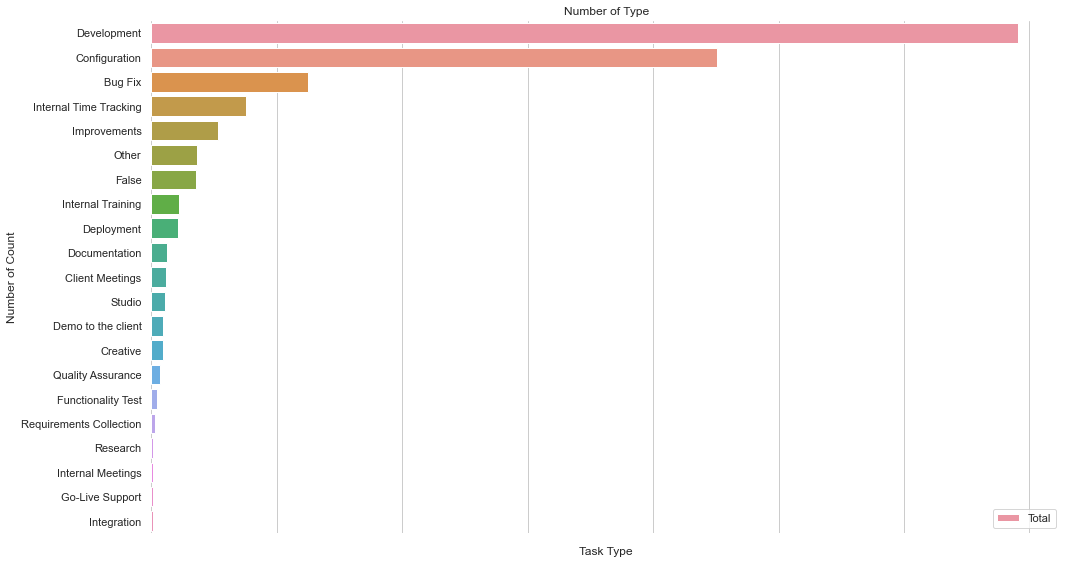

In [10]:
## Plot Count task type
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
sns.barplot(y= "Task Type", x ="External ID", data=count_type,
            label="Total", orient = 'h')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Number of Count",xlabel="Task Type",title = "Number of Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [11]:
import re

In [12]:
print(All_tasks.columns)

print(All_tasks["Description"])

Index(['External ID', 'Title', 'Sprint Start Date', 'End Date', 'Task Type',
       'Project', 'Assigned to', 'Assigned to Developer', 'Total Hours',
       'Hours Spent', 'Remaining Hours', 'Progress', 'Deadline',
       'Task Difficulty', 'Stage', 'Active', 'Assigned QA', 'Assigning Date',
       'Billable', 'Client', 'Working days to assign', 'Working days to close',
       'Working hours to assign', 'Working hours to close', 'Start Date',
       'Stage name', 'Project Manager', 'Project Status', 'Non-Billable',
       'Blocked Reason', 'Created by', 'Created On', 'Customer',
       'Delivery Team', 'Delivery Partner', 'Description', 'Ending Date',
       'Hours Open', 'Initially Planned Hours', 'LOC-D', 'LOE-C', 'LOE-Q',
       'Priority', 'Sprint'],
      dtype='object')
0       <p><span style='font-family: Roboto, "Odoo Uni...
1       <p><font style="background-color: rgb(200, 8, ...
2       <p>The date issue is back. <br><br>The date as...
3       <p><b>This task will</b>: Modif

In [13]:
TAG_RE = re.compile(r'<[^>]+>')
for i in range (len(All_tasks)):
        All_tasks["Description"][i] = TAG_RE.sub('', str(All_tasks["Description"][i]))


<ipython-input-13-eafb8ce43a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_tasks["Description"][i] = TAG_RE.sub('', str(All_tasks["Description"][i]))


In [14]:
print(All_tasks["Description"])

0        Quote, View, and Printed View aren't the same...
1       T4431 — Passed -&gt;  Not Deployed From Previo...
2       The date issue is back. The date assignment sh...
3       This task will: Modify an existing ModuleModul...
4                                                        
                              ...                        
3964                                                     
3965                                                     
3966                                                  nan
3967                                                     
3968    Include shipping pricing and selection for eac...
Name: Description, Length: 3969, dtype: object


# Mid-Term Presentaion

#### a) One way to address this by identifying top x requests. This can be identified from the description column in Tickets dataset. This would help organize data into groups of types of requests.

In [15]:
#Ticket Type 
ticket_type = pd.DataFrame(tickets.groupby('Ticket Type')['ID'].count().sort_values(ascending=False).reset_index())
ticket_type

,Ticket Type,ID
0,Issue - Internal,304
1,Question,283
2,Configuration - Simple,280
3,Development Task (<10 hrs),259
4,Issue - External,207
5,Configuration - Complex,100
6,Creative Request,23
7,Development Project (>10 hrs),8


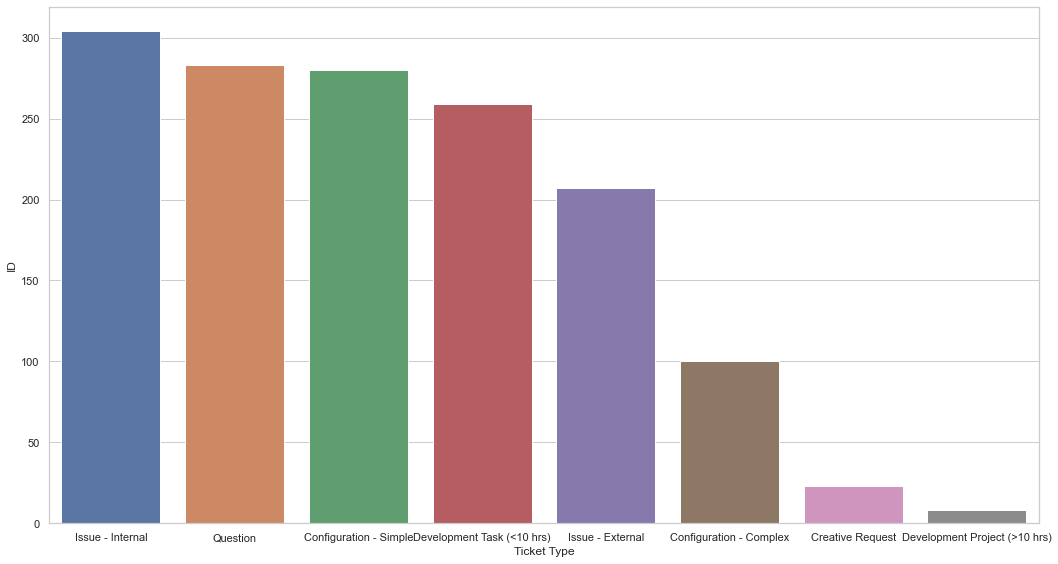

In [16]:
## PlotTicket Type
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
sns.barplot(x = "Ticket Type", y="ID", data=ticket_type,
            label="Total")

plt.tight_layout()
plt.xlabel('xlabel', fontsize=18)
plt.show()

In [17]:
tickets.loc[tickets['Description'].str.contains("server", case=False, na=False),"Issue"] = "Server Issue"
tickets.loc[tickets['Description'].str.contains("login", case=False, na=False),"Issue"] = "Login Issue"
tickets.loc[tickets['Description'].str.contains("invoice", case=False, na=False),"Issue"] = "Invoice Issue"
tickets.loc[tickets['Description'].isnull(),"Issue"] = np.nan
tickets.loc[tickets['Issue'].isnull()&(~tickets['Description'].isnull()), "Issue"] = "Other Issue"

In [18]:
ticket_issue = pd.DataFrame(tickets["Issue"].value_counts().sort_values(ascending=False).reset_index())
ticket_issue

,index,Issue
0,Other Issue,1249
1,Invoice Issue,107
2,Server Issue,28
3,Login Issue,11


In [19]:
tickets["Issue"]

0        Server Issue
1        Server Issue
2       Invoice Issue
3         Other Issue
4         Other Issue
            ...      
1664              NaN
1665              NaN
1666              NaN
1667              NaN
1668              NaN
Name: Issue, Length: 1669, dtype: object

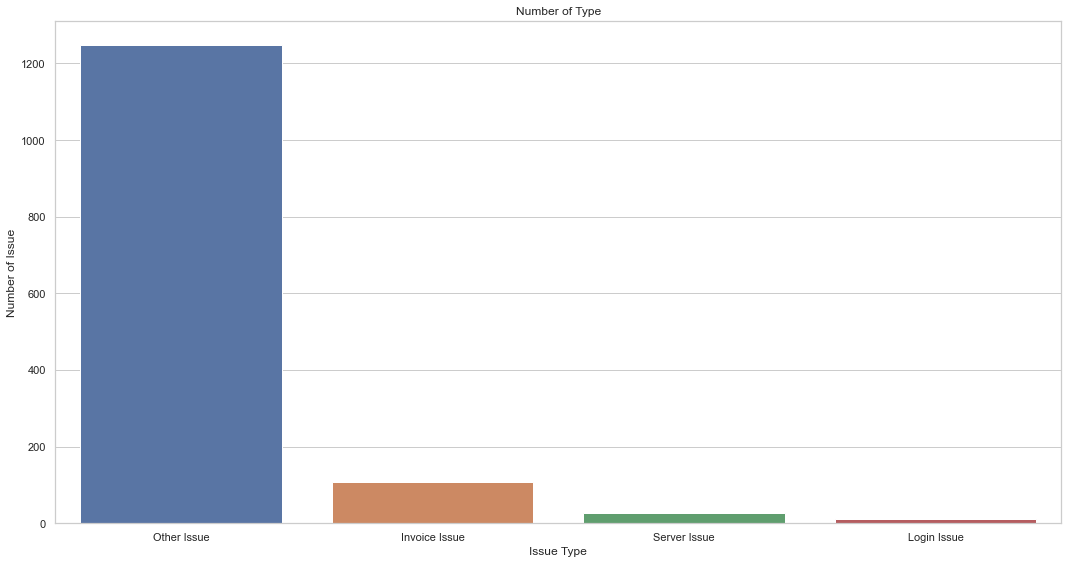

In [20]:
## Plot Ticket Issue
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
sns.barplot(x = "index", y="Issue", data=ticket_issue,
            label="Total")
ax.set(ylabel="Number of Issue",xlabel="Issue Type",title = "Number of Type")

plt.tight_layout()
plt.show()

#### b) Creating a visual dashboards around top requests, and allowing deep dive within each relatedcolumns would be interesting. For example, which clients often encounter login issues, etc.

In [21]:
#Issue Type 
issue_type = pd.DataFrame(tickets.groupby(['Issue','Client'])['ID'].count()).sort_values(by=["Issue", "ID"],ascending=False).reset_index()
issue_type

,Issue,Client,ID
0,Server Issue,Wild Leaf Beverage,13
1,Server Issue,Mountain Meadow Herbs,3
2,Server Issue,Silverdale Technology LLC,3
3,Server Issue,Cellpoint Corporation,2
4,Server Issue,"Mid-America Gardens, LLC",2
5,Server Issue,Continuant,1
6,Server Issue,EquityTeam,1
7,Server Issue,Zuma Sales LLC,1
8,Other Issue,Wild Leaf Beverage,527
9,Other Issue,Cellpoint Corporation,113


<Figure size 2160x1800 with 0 Axes>

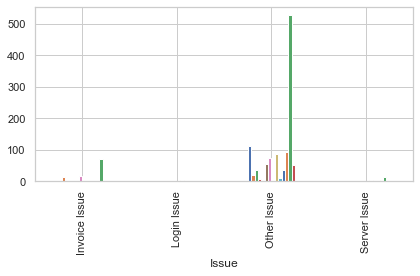

In [22]:
plt.figure(figsize=(30, 25))
issue_type.pivot('Issue','Client','ID').plot(kind ='bar',legend =None)


plt.tight_layout()
plt.show()

#### c) Longitudinal analysis, trends over years, months can also be interesting. There is a timestamp information the data.¶

In [23]:
# How many tasks in each Sprint End Date
billable_taks = All_tasks.loc[All_tasks["Billable"]==True]
nonbill_taks = All_tasks.loc[All_tasks["Billable"]==False]

billable_taks

,External ID,Title,Sprint Start Date,End Date,Task Type,Project,Assigned to,Assigned to Developer,Total Hours,Hours Spent,...,Delivery Partner,Description,Ending Date,Hours Open,Initially Planned Hours,LOC-D,LOE-C,LOE-Q,Priority,Sprint
0,__export__.project_task_5017_e26a0a93,Quote View and Printed View aren't the same.,2021-09-20,2021-09-26,Development,Zuma: Odoo Implementation Phase 1 (P111),Fahad Hussain Malik,Raheel Aslam,3.08,3.08,...,Silverdale Technology LLC,"Quote, View, and Printed View aren't the same...",2021-09-30 02:25:08,729,11.000000,7.0,2.0,2.0,Important,Sprint 2139
1,__export__.project_task_4668_2132a98f,WildLeaf Deploy To Deployment + Production(2135),2021-08-23,2021-08-29,Deployment,Wild Leaf: Help (P22),Mir Muhammad Muzammil,False,0.00,0.00,...,Silverdale Technology LLC,T4431 — Passed -&gt; Not Deployed From Previo...,2021-08-30 14:31:01,1376,0.000000,0.0,0.0,0.0,Important,Sprint 2135
2,__export__.project_task_4615_92c814c2,NMS Export File Name Date Issue,2021-08-16,2021-08-22,Bug Fix,Cellpoint: Odoo for Boost Files (P165),Farman Ahmad Cheema,Raheel Aslam,0.50,0.50,...,Silverdale Technology LLC,The date issue is back. The date assignment sh...,2021-08-20 23:58:47,1582,0.000000,0.0,0.0,0.0,Important,Sprint 2134
6,__export__.project_task_3368_42f01262,Automatically change Sales Order quantities ba...,2021-08-30,2021-09-05,Development,Wild Leaf: Consignment and Sales Improvements ...,Abdul Hameed,Muhammad Bilal,105.92,105.92,...,Silverdale Technology LLC,This will be part of a consignment automation ...,2021-09-15 02:25:22,4441,106.000000,106.0,0.0,0.0,Important,Sprint 2136
7,__export__.project_task_3352_2b81901d,VAT on invoice not reflecting correctly,NaT,NaT,Bug Fix,MMH Dr. Clark: Help (P106),Jeff Gross,Muhammad Bilal,20.42,20.42,...,Silverdale Technology LLC,Following is the scenario to figure out the is...,2021-06-30 02:25:39,4561,5.333333,0.0,0.0,0.0,Important,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,__export__.project_task_4378_25b614d3,Split UEDF File by SKU,2021-08-16,2021-08-22,Development,Cellpoint: Odoo for Boost Files (P165),Farman Ahmad Cheema,Raheel Aslam,18.42,18.42,...,Silverdale Technology LLC,Pre-requisite: UEDF Export Import Utility Task...,2021-08-31 02:25:28,2037,15.000000,0.0,0.0,0.0,Normal,Sprint 2134
3908,__export__.project_task_1825_4375fd75,Propertyworx Deployment 2049,2020-11-30,2020-12-06,Configuration,PWX: Help (P23),Muzher Siddique,False,2.00,2.00,...,Silverdale Technology LLC,"Modules deployed: company_strategy, propertywo...",2020-12-10 17:46:56,7614,2.000000,0.0,0.0,0.0,Normal,Sprint 2049
3920,__export__.project_task_4364_0051b8f4,UEDF File Import Export Utility,2021-08-09,2021-08-15,Development,Cellpoint: Odoo for Boost Files (P165),Farman Ahmad Cheema,Danish Hassan,3.50,3.50,...,Silverdale Technology LLC,"1. On the NMS Bounce Utility view, have to add...",2021-08-25 02:25:25,2086,4.000000,0.0,0.0,0.0,Normal,Sprint 2133
3921,__export__.project_task_1720_7546b653,activity view: Research Activity Access Rights,2020-12-07,2020-12-13,Configuration,PWX: Help (P23),Levi Barnes,Fahad Hassan,4.00,4.00,...,Silverdale Technology LLC,Research if it is possible to view the schedul...,2020-12-10 19:33:20,7736,5.000000,0.0,0.0,0.0,Normal,Sprint 2050


Text(0.5, 1.0, 'TimeSeries of Number of Tasks')

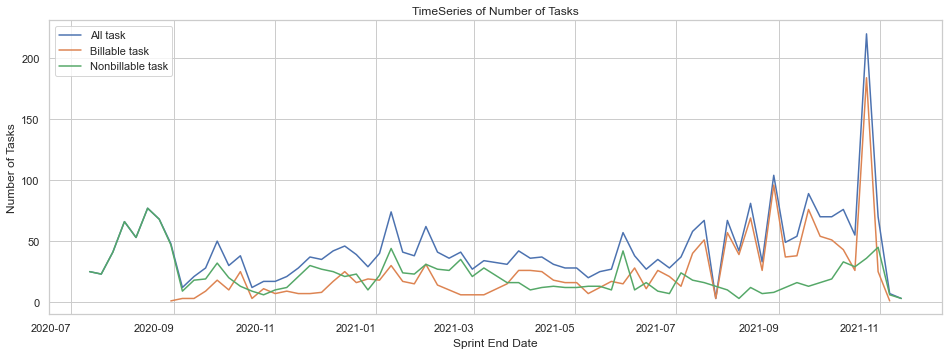

In [24]:
# TimeSeries of How many tasks in each Sprint End Date
plt.figure(figsize=(16, 6))
All_tasks.groupby('End Date')['External ID'].size().plot(label = "All task")
billable_taks.groupby('End Date')['External ID'].size().plot(label = "Billable task")
nonbill_taks.groupby('End Date')['External ID'].size().plot(label = "Nonbillable task")

plt.legend()
plt.xticks(rotation = 0)
# Label for x-axis
plt.xlabel("Sprint End Date")
  
# Label for y-axis
plt.ylabel("Number of Tasks")

# title of the plot
plt.title("TimeSeries of Number of Tasks")

#### d) Can we apply text mining techniques to identify request that are similar. For example, difficulty in login, email not working, login failed, can be grouped as similar requests. 

In [25]:
!pip install nltk

In [26]:
import nltk

In [27]:
tickets = pd.read_excel('/Users/Sayli/Documents/Masters/ALY 6080/Dataset/Tickets form.xlsx', sheet_name="Tickets")

In [28]:
# transform text into lower case. 
tickets['Display Name'] = tickets['Display Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tickets['Display Name'].head()

0           urgent fatal error - please assist (#2749)
1         all reserved quantities are set to 0 (#2743)
2    fw: [external]re: wild leaf holdings u.s. llc ...
3                     fw: [external]asap issue (#2727)
4                                  email issue (#2721)
Name: Display Name, dtype: object

In [29]:
# Removing Punctuation
tickets['Display Name'] = tickets['Display Name'].str.replace('[^\w\s]','')
tickets['Display Name'].head()

0               urgent fatal error  please assist 2749
1            all reserved quantities are set to 0 2743
2    fw externalre wild leaf holdings us llc invoic...
3                           fw externalasap issue 2727
4                                     email issue 2721
Name: Display Name, dtype: object

In [30]:
# Remove numbers
tickets['Display Name'] = tickets['Display Name'].apply(lambda x: "".join(letter for letter in x if not letter.isdigit()))
tickets['Display Name'].head()

0                   urgent fatal error  please assist 
1                 all reserved quantities are set to  
2    fw externalre wild leaf holdings us llc invoic...
3                               fw externalasap issue 
4                                         email issue 
Name: Display Name, dtype: object

In [31]:
# Removal of Stop Words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Sayli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop = stopwords.words('english')

In [33]:
my_stop_words=["fw","fwd"]

In [34]:
tickets['Display Name'] = tickets['Display Name'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tickets['Display Name'] = tickets['Display Name'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))

tickets['Display Name'].head()

0                     urgent fatal error please assist
1                              reserved quantities set
2    externalre wild leaf holdings us llc invoice r...
3                                   externalasap issue
4                                          email issue
Name: Display Name, dtype: object

In [35]:
# remove these words as their presence will not of any use in classification of our text data.
#freq = list(freq.index)
#tickets['Display Name'] = tickets['Display Name'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#tickets['Display Name'].head()

In [36]:
# Rare words removal
# freq = pd.Series(' '.join(tickets['Display Name']).split()).value_counts()[-10:]
# freq

In [37]:
pip install -U textblob

Requirement already up-to-date: textblob in /Users/Sayli/opt/anaconda3/lib/python3.8/site-packages (0.17.1)
Note: you may need to restart the kernel to use updated packages.


In [38]:
# Spelling correction
from textblob import TextBlob
tickets['Display Name'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                  urgent fatal error please assist
1                           reserved quantities set
2    external wild leaf holdings us ll voice red in
3                                externalasap issue
4                                       email issue
Name: Display Name, dtype: object

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Sayli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
# Stemming
# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. 
from nltk.stem import PorterStemmer

In [41]:
st = PorterStemmer()
tickets['Display Name'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                   urgent fatal error pleas assist
1                               reserv quantiti set
2    externalr wild leaf hold us llc invoic ref inv
3                                 externalasap issu
4                                        email issu
Name: Display Name, dtype: object

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Sayli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
# Lemmatization converts the word into its root word
from textblob import Word
tickets['Display Name'] = tickets['Display Name'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tickets['Display Name'].head()

0                     urgent fatal error please assist
1                                reserved quantity set
2    externalre wild leaf holding u llc invoice ref...
3                                   externalasap issue
4                                          email issue
Name: Display Name, dtype: object

In [44]:
# Common word removal
# the 10 most frequently occurring words in our text data then take call to remove or retain.
freq = pd.Series(' '.join(tickets['Display Name']).split()).value_counts()[:10]
freq

error       162
order       145
invoice     120
odoo        114
issue        97
paid         85
sale         78
customer     61
sor          59
report       55
dtype: int64

In [45]:
# Word Cloud
!pip install wordcloud

In [54]:
from wordcloud import WordCloud

In [55]:
text = ""
for letter in tickets['Display Name']:
    text += " " +letter
text

' urgent fatal error please assist reserved quantity set externalre wild leaf holding u llc invoice ref inv externalasap issue email issue install password strength module p customer payment error product analytical account required scrap negative line item install url module tc so copacking mo validation error unable close create backorder lcslcsprd authorizenet test mode error processing wlvprd urgent user lost fa access catchall email address validation script error invoice portal testing feedback clean data production environment timezone conversion sor contact issue urgent incoming mail server issue uedf processed state updated based uedf file marked processed shopify order fulfillment odoo fo requires another format use letter odoo apps purchase p zuma server invoice email portal link login issue website error helpdesk ticket access subscription renewal check analytic account field mandatory vendor bill customer invoice odoo two factor authentication help broke shut midamerica sa

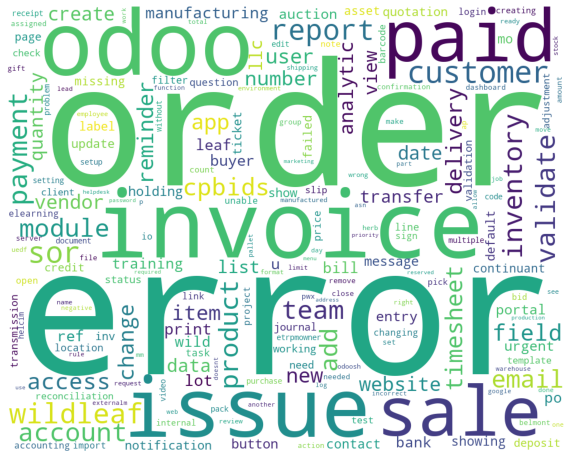

In [56]:
#Workcloud in square (by default)
plt.figure(figsize = (10,10))
wordcloud = WordCloud(
    width = 1000, height = 800,
background_color ='white',
collocations=False,
#min_font_size = 10
                     ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()





In [57]:
k-means clustering -->groups , names 

them take works tonees  automnation 

SyntaxError: invalid syntax (<ipython-input-57-93798148b823>, line 1)

In [58]:
#K Means Clustering


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score

text = tickets['Display Name'].values

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)





In [59]:
def find_Optimal_k(text, kmax):
    sse = []
    iters = range(1, kmax+1, 1)
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size = 2048 , random_state=20).fit(text).inertia_)
        print('Fit {} cluster'.format(k))
        
        
    f, ax = plt.subplots(1,1)
    ax.plot(iters,sse,marker = 'o')
    ax.set_xlabel("Cluster Centers")
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel("SSE")
    ax.set_title("SSE by cluster center plot")
    


Fit 1 cluster
Fit 2 cluster
Fit 3 cluster
Fit 4 cluster
Fit 5 cluster


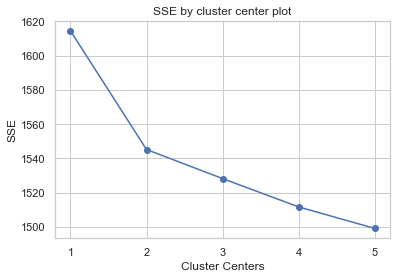

In [61]:
find_Optimal_k(X, 5)

In [62]:
!pip install yellowbrick

In [69]:
true_k=3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [73]:
order_centroids

array([[ 108,  550,  650, ..., 1065, 1066,    0],
       [ 645, 1096,  669, ..., 1066, 1067,    0],
       [ 966,  484,  922, ..., 1552,  550,  645]])

In [80]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind]),


Top terms per cluster:
Cluster 0:
 asset
 fixed
 import
 journal
 entry
 wildleaf
 add
 problem
 urgent
 id
 confirm
 description
 creating
 visible
 vendor
 number
 button
 customer
 field
 express
 feedback
 expired
 favourite
 fbo
 feature
 fee
 feed
 expire
 fault
 fetch
Cluster 1:
 identify
 public
 information
 cant
 see
 user
 feed
 failed
 fatal
 fault
 favorite
 favourite
 fbo
 feature
 fee
 zuma
 feedback
 fetch
 field
 file
 filename
 fill
 filling
 filter
 final
 find
 fahad
 fa
 factor
 finished
Cluster 2:
 paid
 error
 odoo
 sor
 order
 invoice
 issue
 sale
 validate
 team
 report
 customer
 timesheets
 payment
 email
 reminder
 inventory
 account
 wildleaf
 cpbids
 access
 module
 product
 website
 add
 new
 change
 delivery
 po
 item


In [57]:
#Predict cluster for data


X = vectorizer.transform(["Urgent request for deployement"])
prediction = model.predict(X)
print(prediction)





[4]
